# Part I - Fordgobike tripdata Exploration

## Introduction

This notebook performs an exploratory data analysis (EDA) on the **201902-fordgobike-tripdata** dataset. We will first perform univariate, bivariate, and multivariate explorations, then craft an explanatory analysis to communicate key insights.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

> Note that the collective size of all your files in the current worksapce **must not exceed 1 GB** in total. 


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


### What is the structure of your dataset?

> The dataset contains 183,412 bike-share trips described by 16 variables.
> - **Numeric**: ride duration(duration_sec), station IDs, bike ID, station lat-longs, and rider birth year
> - **Categorical**: user type(Subscriber|Customer), gender(Male|Female|Other), and Bike-Share-for-All flag (Yes | No).
> - **Temporal**: start and end timestamps.


### What is/are the main feature(s) of interest in your dataset?

> - Trip duration (duration_sec)
>
> - User type (user_type)
>
> - Whether the trip was part of bike-share-for-all program (bike_share_for_all_trip)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - member_birth_year (age proxy)
> - start_time / end_time (derive day and hour)
> - member_gender
> - stasrt_station_id / end_station_id (spatial context)

## Univariate Exploration

### What is the distribution of trip durations?

In [4]:
# Basic summary of trip durations
summary = df['duration_sec'].describe()
outliers_count = (df['duration_sec'] > df['duration_sec'].quantile(0.95)).sum()

print("Trip Duration Summary (seconds):")
print(summary, "\n")
print(f"Trips above the 95th percentile (outliers): {outliers_count}")

Trip Duration Summary (seconds):
count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64 

Trips above the 95th percentile (outliers): 9168


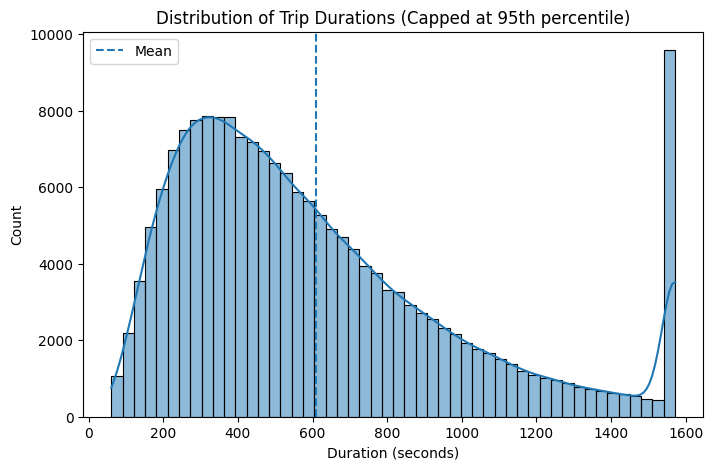

In [5]:
# Cap at 95th percentile for visualization
dur_cap = df['duration_sec'].quantile(0.95)
df['duration_sec_clip'] = df['duration_sec'].clip(upper=dur_cap)

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='duration_sec_clip', bins=50, kde=True)
plt.axvline(df['duration_sec_clip'].mean(), linestyle='--', label='Mean')
plt.title('Distribution of Trip Durations (Capped at 95th percentile)')
plt.xlabel('Duration (seconds)')
plt.legend()
plt.show()

### Observations
> The distribution is strongly right-skewed. Most rides cluster between 200 s and 800 s (≈ 3–13 min).
>
> The dashed line shows the mean at ~600 s; it sits right of the modal peak, confirming that long-tail values pull the average upward.
>
> A spike appears at the far-right edge, representing trips that exceeded the 95th percentile cap and were clipped to that ceiling.

### What is the proportion of subscribers vs. customers?

/tmp/ipykernel_68/212989720.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index,


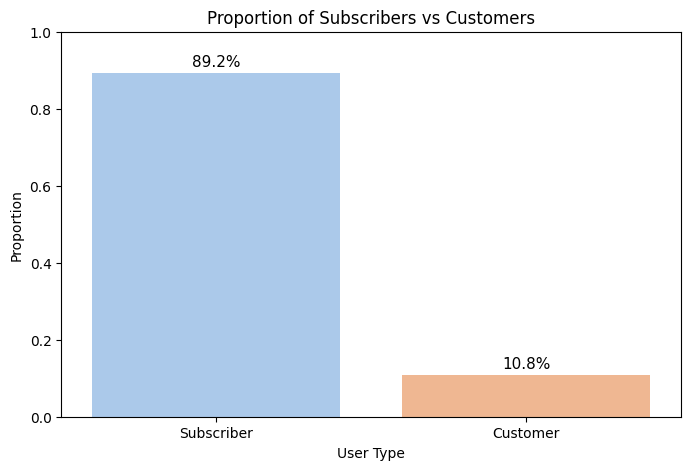

In [6]:
# Compute proportions
counts = df['user_type'].value_counts()
proportions = counts / counts.sum()

# Plot proportions
plt.figure(figsize=(8,5))
sns.barplot(x=proportions.index, 
            y=proportions.values, 
            palette="pastel")
plt.title("Proportion of Subscribers vs Customers")
plt.xlabel("User Type")
plt.ylabel("Proportion")

# Annotate percentages on bars
for i, p in enumerate(proportions.values):
    plt.text(i, p + 0.01, f"{p:.1%}", ha="center", va="bottom", fontsize=11)
    
plt.ylim(0,1)
plt.show()

### Observations
> The user base is heavily dominated by Subscribers, who account for ≈ 89 % of all rides.
> 
> Customers make up only about 11 %, indicating that casual, pay-per-ride usage is a small fraction of total demand.

### What is the gender distribution among member?

/tmp/ipykernel_68/1532350554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='member_gender',


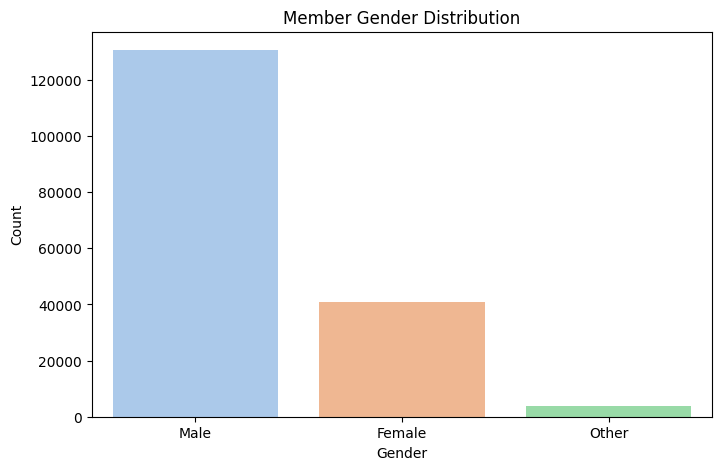

In [7]:
# Plot the gender distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='member_gender', 
              order=df['member_gender'].value_counts().index, 
              palette='pastel')
plt.title("Member Gender Distribution")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Observations
> Male riders dominate the system, accounting for roughly three-quarters of all trips.
> 
> Female participation is much lower, at about one-third of the male count, and the “Other” category is minimal.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **The distribution is strongly right-skewed**
> - Median = 514s vs. Mean = 726s, indicationg a long tail.
> - Durations range from 61s up to 85,444s.
>
> **Outliers:**
> - 9,168 rides (=5%) exceed the 95th percentile cutoff and account for most of the skew.
> - These extreme trips are likely rebalancing moves or data errors.
>
> **Transformations:**
> - For EDA visuals, durations are **capped at the 95th percentile**.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Both plots revealed patterns that were notable but not truly dirty data, so only minimal wrangling was required.
> - User Type: The bar chart shows an 89 : 11 split in favour of Subscribers.This imbalance is a genuine characteristic of the service, so I left the counts unchanged. No recoding or resampling was applied.
> - Member Gender: The distribution is also skewed. Again, the skew reflects real usage rather than data error, so the raw values were preserved.
>
> In short, the categorical features displayed expected but strong class imbalance that required no cleaning, while numeric fields with genuine outliers or obvious errors were either clipped (for visual clarity) or removed (to prevent distortion).

## Bivariate Exploration

### How does trip duration vary with rider age?

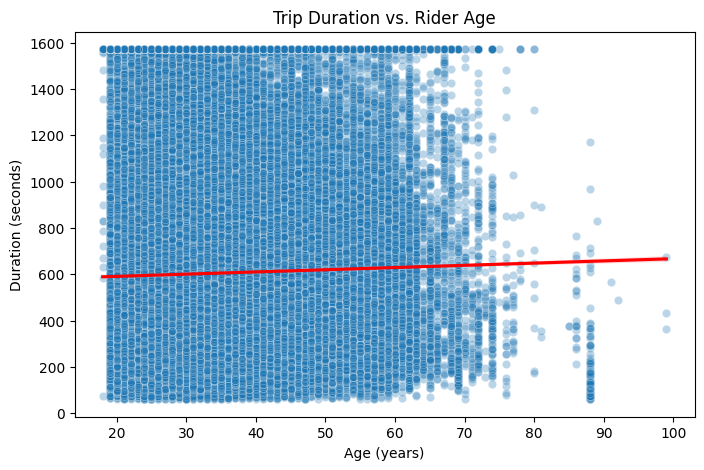

In [9]:
# Create rider age column
current_year = 2019
df['rider_age'] = current_year - df['member_birth_year']

# Remove implausible ages(between 16-100 years old)
df_age = df[df['rider_age'].between(16, 100)]

# scatterplot with regression line
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_age, 
                x='rider_age', 
                y='duration_sec_clip', 
                alpha=0.3)
sns.regplot(data=df_age, 
            x='rider_age', 
            y='duration_sec_clip', 
            scatter=False, 
            color='red')
plt.title('Trip Duration vs. Rider Age')
plt.xlabel('Age (years)')
plt.ylabel('Duration (seconds)')
plt.show()

### Observations
> The red regression line is almost flat: trip duration rises only slightly with age, indicating a very weak positive relationship.
> 
> Younger riders generally show the full spread of ride lengths, while riders above 70 yr split into two groups

### Does trip duration differ between subscribers and customers?

/tmp/ipykernel_68/3718232269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='user_type', y='duration_sec_clip', palette='pastel')


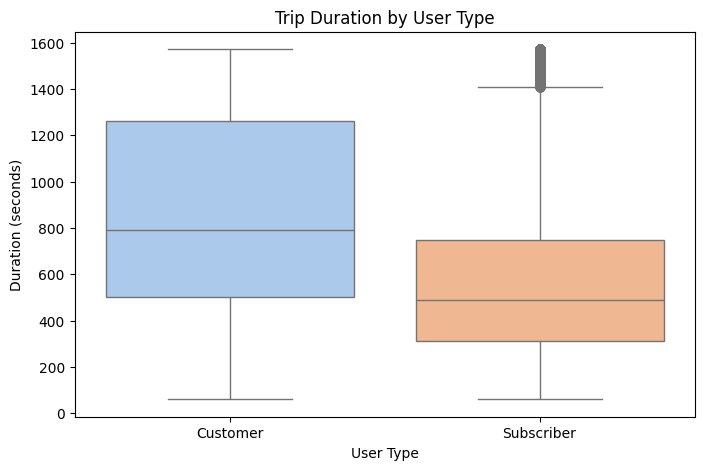

In [13]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='user_type', y='duration_sec_clip', palette='pastel')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')
plt.show()

### Observations
> Customers take markedly longer trips than Subscribers. The customer median sits around 800s, vs. ≈ 500s for subscribers.
>
> The entire customer distribution is shifted upward
> 
> Despite the longer tails, the subscriber box is more compact, reflecting consistent, commute-style usage, whereas customers exhibit a leisure-oriented pattern with many rides pushing past 15 min.

### Is the Bike Share for all program usage different across user types?

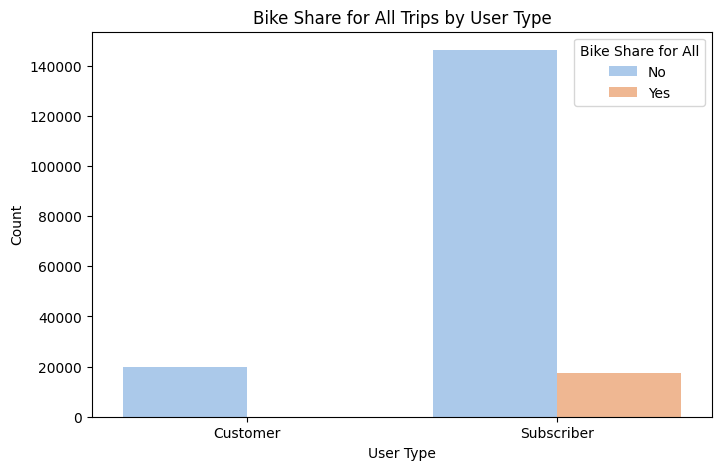

In [16]:
# Count how many rieds in the Bike-Share-for-All program by user type
share_counts = df.groupby(['user_type', 'bike_share_for_all_trip']).size().reset_index(name='count')

# Clustered bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=share_counts, 
            x='user_type', 
            y='count',
            hue='bike_share_for_all_trip',
            palette='pastel')
plt.title('Bike Share for All Trips by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.legend(title='Bike Share for All')
plt.show()

### Observations
> Bike-Share-for-All rides (orange bars) are almost exclusively taken by Subscribers.
>
> Fewer than a handful of Customer trips use the discounted pass, compared with tens of thousands among Subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Trip duration vs. rider age: The scatterplot shows a very week, slightly positive trend: most rides last 5-15 min regardless age, but the red regression line nudges upward by a few seconds per additional year. Age explains almost none of the variation - ride lenght is largely age-independent.
> - Trip duration by user type: Customers ride much longer than Subscribers. Customers' median is roughly double and thier inter-quartile range is wider. I guess that customera are occasional users who may take tourist trips, whereas subscribers rely on bikes for short, routine commutes.
> - Bike-Share-for-All participation: Almost every ride was from subscribers, and very few came from one-time customers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - Age vs. trip length: After keeping only ages 16-100, we saw that most riders are young adults. The small group of older rider(70+) shows a big spread in trip times. Some take very quick rides, others go for very long ones. This wide mix for seniors is easy to miss in summary numbers but pops out in the scatterplot.

## Multivariate Exploration

### How does average trip duration change through the day, and does the pattern differ between Subscribers and Customers on weekdays vs. weekends?

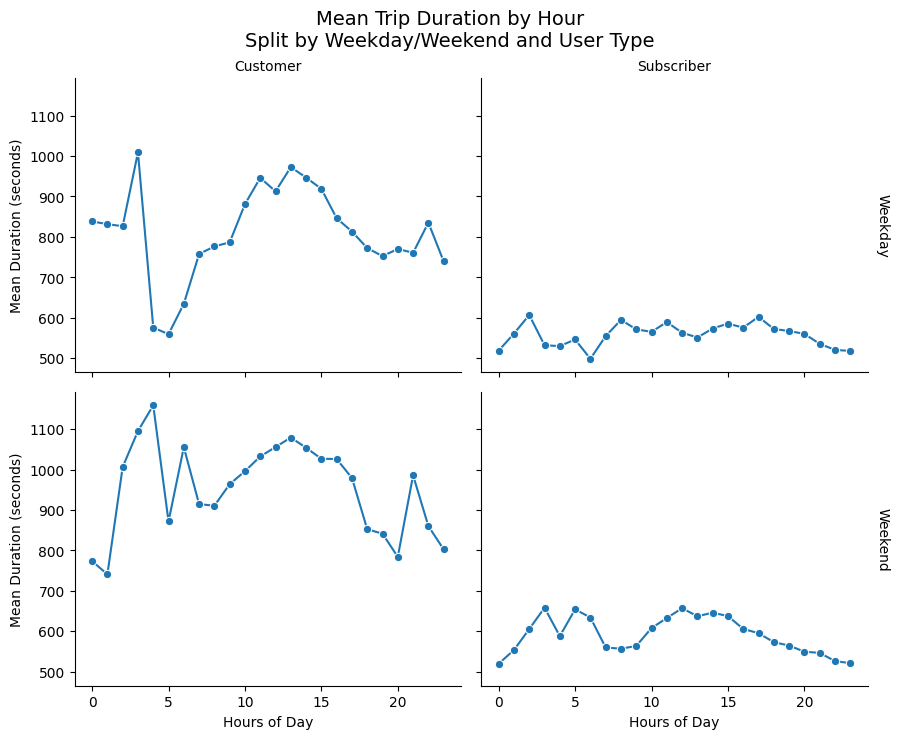

In [23]:
# Prepare additional time features
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_hour'] = df['start_time'].dt.hour
df['weekday_type'] = np.where(df['start_time'].dt.dayofweek < 5, 'Weekday', 'Weekend')

# Aggeregate: mean duration by hour, user type, weekday/weekend
hourly = (df.groupby(['weekday_type', 'user_type', 'start_hour'])
         ['duration_sec_clip'].mean().reset_index())

# Facet plot: one row = weekday/weekend, one col = user type
g = sns.FacetGrid(hourly,
                 row='weekday_type',
                 col='user_type',
                 height=3.5,
                 aspect=1.3,
                 margin_titles=True)
g.map_dataframe(sns.lineplot,
               x='start_hour',
               y='duration_sec_clip',
               marker='o')
g.set_axis_labels('Hours of Day', 'Mean Duration (seconds)')
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.fig.suptitle('Mean Trip Duration by Hour\nSplit by Weekday/Weekend and User Type',
              y=1.05, fontsize=14)
plt.show()

### Observations
> **Subscriber rides show a stead commute pattern on weekdays**: two gentle peaks around 08h and 17h, each averaging just over 550 s, then a flat, slightly longer profile on weekends. => Indicates routine, point-to-point travel aligned with work hours.
>
> **Customer rides show a clear leisure pattern**
: they are short before sunrise, but get much longer from mid-morning (about 9 a.m.) through early afternoon on weekdays. At weekends the trips are even longer—already over 18 minutes in the early morning and staying above 16 minutes for most of the day.

### What pair-wise relationships exist among trip duration, rider age, and hour-of-day?

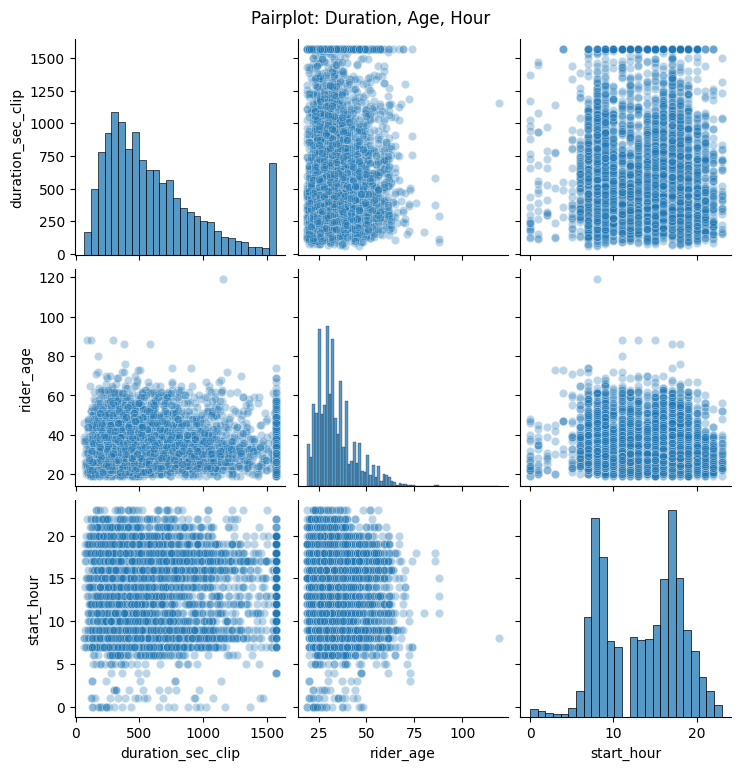

In [25]:
# Select numeric features & sample for readability
numeric = df[['duration_sec_clip', 'rider_age', 'start_hour']].sample(5000, random_state=1)

# plot 
sns.pairplot(numeric, diag_kind='hist', plot_kws=dict(alpha=0.3))
plt.suptitle('Pairplot: Duration, Age, Hour', y=1.02)
plt.show()

### Observations
> Duration vs. Age – Points form a loose cloud with only a slight upward tilt: older riders average a bit longer, but the pattern is weak.
>
> Duration vs. Hour – Rides in the very early morning (0–5h) show a wider spread and a few long trips, while daylight hours concentrate between 300s and 800s.
> 
> Age vs. Hour – No clear structure: riders of all ages use the system at all times of day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - Time-of-day plus user type gives the clearest signal.
> In the four-panel line plot, subscriber rides hug the classic commute pattern on weekdays (two gentle peaks around 08 h and 17 h, each ~550 s) then flatten at the weekend. Customer rides, by contrast, last 800–1 000 s through the late-morning / early-afternoon band and climb even higher on Saturdays. Overlaying hour with user type therefore sharpens the basic story we saw earlier: customers take longer, leisure-oriented trips, whereas subscribers make shorter, schedule-driven journeys.

> - Weekend vs. weekday strengthens the effect.
> Once we split by weekday/weekend, the duration gap expands: customer rides add roughly two extra minutes on weekends, while subscriber rides add less than one. The day-type facet thus magnifies how usage context affects trip length.

### Were there any interesting or surprising interactions between features?

> Late-night outliers for customers.
> The pairplot shows a faint cluster of customer rides after midnight with durations well above 1 000 s. These long, off-peak journeys are masked in aggregate hourly means but appear in the raw scatter.
>
> - Older riders show a split personality.
> In the duration-vs-age panel most seniors (70 +) take very short hops, yet a small subset embark on marathon rides—producing a scattered “long tail” of points. That bimodal behaviour would be invisible if we looked only at averages.
>
> - Hour-vs-age has almost no structure.
> The age-hour scatter is a random cloud, confirming that riders of all ages use the system at similar times. This lack of interaction is itself useful: it suggests time-of-day scheduling strategies don’t need to be age-specific.

## Conclusions
> 1) Trip duration is short and right-skewed.
> 2) User type is the strongest driver of ride length.
> Customers ride roughly twice as long as Subscribers (box-plot).
This gap widens on weekends and during late-morning hours.
> 3) Temporal context sharpens the story.
> Subscribers show two commute peaks on weekdays; customers peak around midday every day and ride longest on weekend afternoons (facet line plot).
> 4) Bike-Share-for-All serves mainly subscribers.
> Discounted rides are concentrated among long-term members, with little uptake from one-off customers—suggesting the programme helps retain, rather than recruit, low-income users.
> 5) Age and gender effects are mild but informative.
> Trip length rises only slightly with age overall, but seniors (70 +) split into very short utility hops and occasional marathon outings.
Male dominance is strongest among subscribers; the customer segment is more gender-balanced.

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

